# Microprocessor trends

In [1]:
# from cursusdef import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## bronnen

https://github.com/brynjarmorka/microprocessor-trend-data/
https://github.com/karlrupp/microprocessor-trend-data

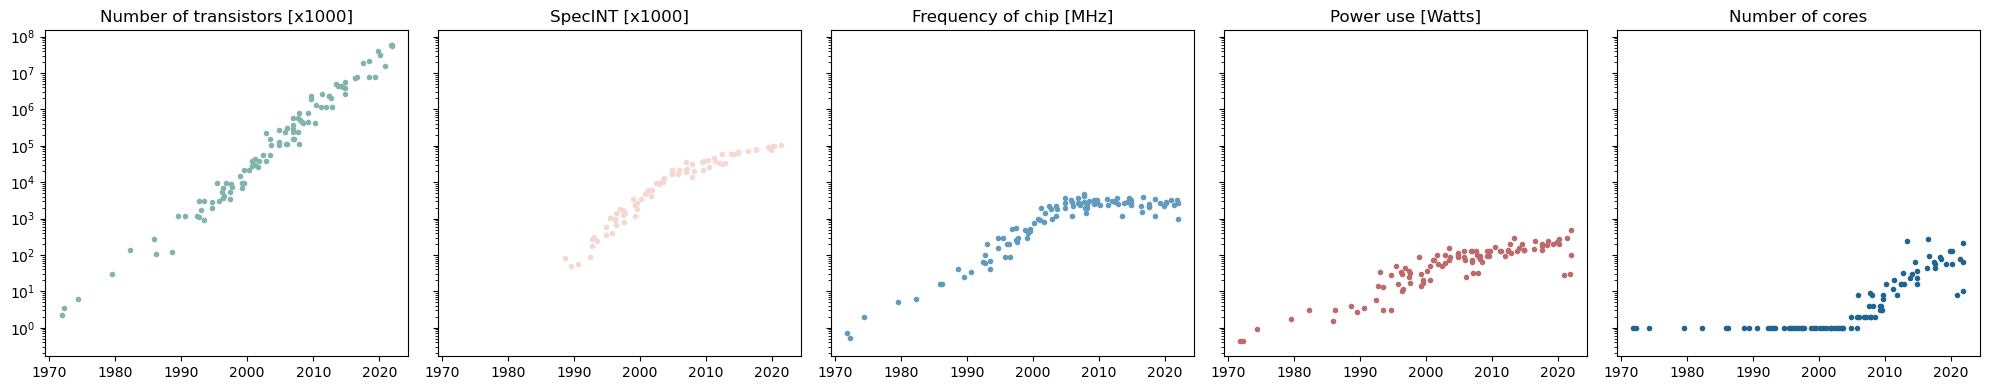

In [3]:
# load in data into numpy arrays
trans = np.loadtxt('50yrs/transistors.dat')
spec = np.loadtxt('50yrs/specint.dat')
freq = np.loadtxt('50yrs/frequency.dat')
watt = np.loadtxt('50yrs/watts.dat')
cores = np.loadtxt('50yrs/cores.dat')
datas = [trans, spec, freq, watt, cores]

def five_year_avg(data):
    data_avg = []
    for period in range(1970, 2025, 5):
        if (data[:,0] < period).sum():
            data_avg.append([period, data[:,1][(data[:,0] > period ) & (data[:,0] < period + 10)].mean()])
    data_avg[-1][0] = 2022  # change last to 2022
    return np.array(data_avg)


data_5yr_avg = [five_year_avg(datas[i]) for i in range(5)]

# define colors and labels/titles
colors = ["#83B3AE", "#F4D8D1","#629BBD","#BC6A6A", "#206490",  "#AE6C6A", "#000000", "#FEF6F4"] # last is background
labels = ["Number of transistors [x1000]", "SpecINT [x1000]", "Frequency of chip [MHz]", "Power use [Watts]", "Number of cores"]

def plot_sub(data, axs, color="blue", marker=".", title=""):
    axs.plot(data[:,0], data[:,1], marker, color=color)
    axs.set_title(title)

def five_simple_subplots():
    fig, axs = plt.subplots(1,5, sharey=True, sharex=True, figsize=(20,4), tight_layout=True)
    for i in range(5):
        plot_sub(datas[i], axs[i], title=labels[i], color=colors[i])
    plt.yscale("log")
    plt.show()

    
five_simple_subplots()

In [4]:
def plot_same(data, color="black", marker="."):
    plt.plot(data[:,0], data[:,1], marker, color=color)

In [5]:
def my_legend(which=[0,1,2,3,4]):
    patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in which]
    dist_from_x0 = .03
    dist_from_top = .95
    plt.legend(bbox_to_anchor=(dist_from_x0, dist_from_top), loc='upper left', handles=patches)

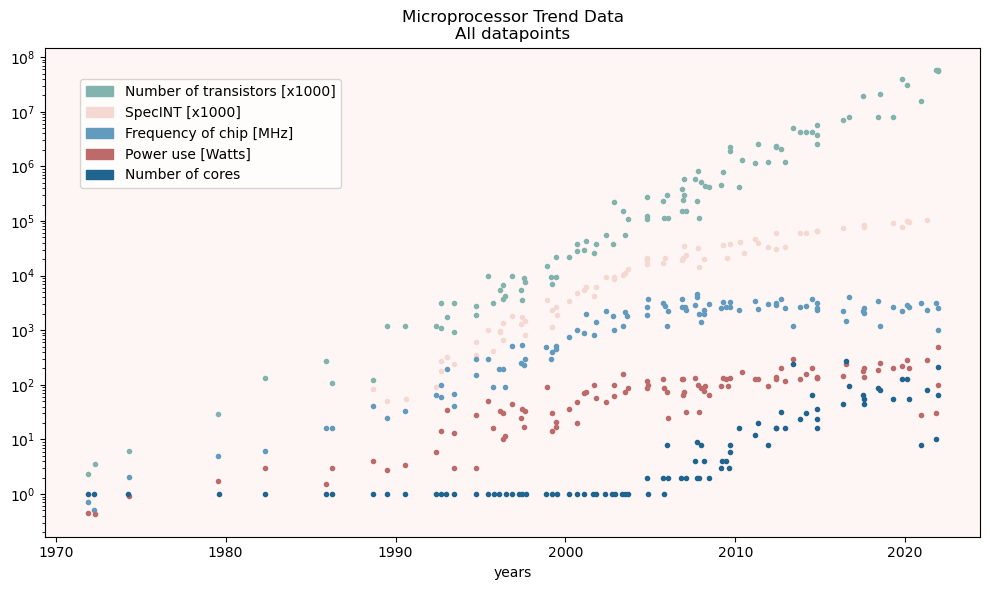

In [6]:
def data_as_points_plot(which=[0,1,2,3,4], figsize=(10,6)):
    fig, ax = plt.subplots(1,1, figsize=figsize, tight_layout=True)
    my_legend(which)
    for i in which:
        plot_same(datas[i], color=colors[i])
    plt.title("Microprocessor Trend Data\nAll datapoints")
    ax.set_facecolor(colors[-1])
    plt.yscale("log")
    plt.xlabel("years")
    plt.show()

    
data_as_points_plot()

## Supercomputer trend data
10 Apr 2019
Karl Rupp has a nice blog series chronicling the developments in microprocessors over the past 42 years. He took the data originally compiled by M. Horowitz, F. Labonte, O. Shacham, K. Olukotun, L. Hammond, and C. Batten. I wanted to compare this data with parallel developments in supercomputing. So I noted down the number of cores in the #1 supercomputer of the Top500 going back to June 1993. The top machine at that time was Thinking Machines Corporation’s CM-5.

[trend](https://samhatfield.co.uk/2019/04/10/supercomputer-trend-data/)




## feature scaling

[N3](https://fuse.wikichip.org/news/7375/tsmc-n3-and-challenges-ahead/)